In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing(as_frame=True)


df = housing.frame


df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dataset shape: (20640, 9)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Statistical summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.0000

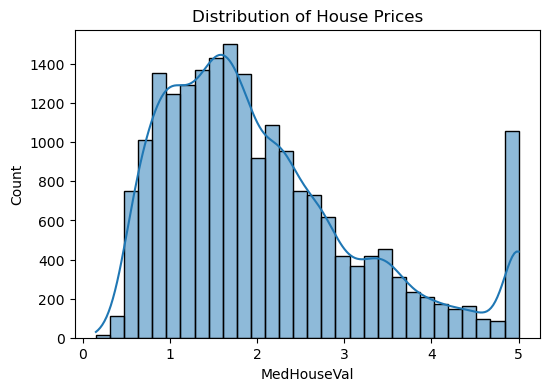

In [5]:
print("Dataset shape:", df.shape)


print("\nDataset info:")
print(df.info())


print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nStatistical summary:")
print(df.describe())


print("\nNumber of duplicate rows:", df.duplicated().sum())

plt.figure(figsize=(6,4))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()


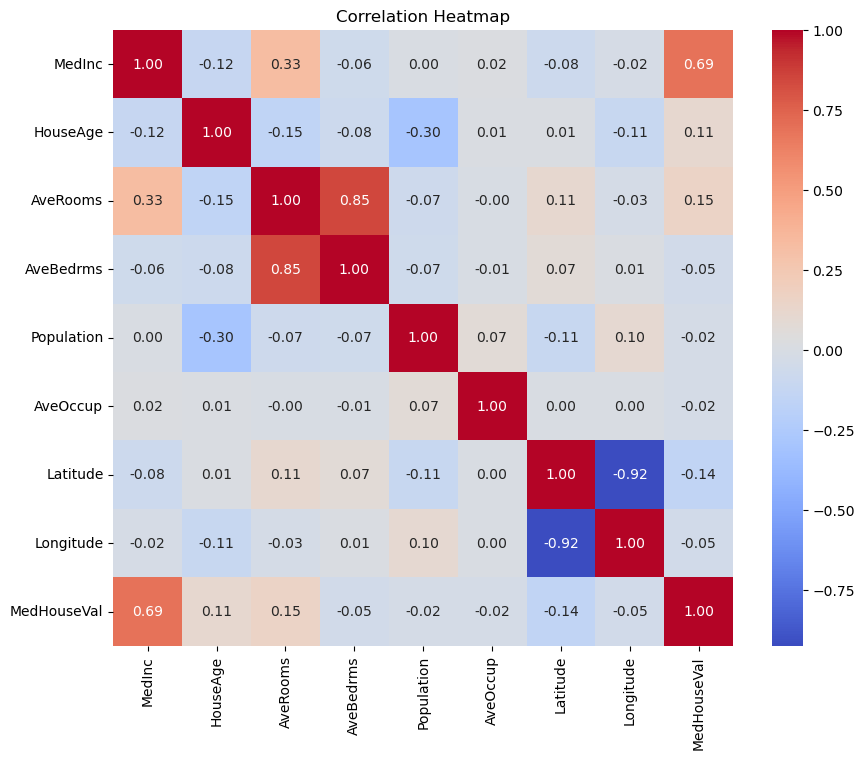


Correlation with target (MedHouseVal):
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [6]:
corr_matrix = df.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


target_corr = corr_matrix['MedHouseVal'].sort_values(ascending=False)
print("\nCorrelation with target (MedHouseVal):")
print(target_corr)

In [7]:
X = df.drop('MedHouseVal', axis=1)  # all columns except target
y = df['MedHouseVal']               

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16512, 8)
Testing set shape: (4128, 8)


In [8]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


Model Evaluation:
Mean Absolute Error (MAE): 0.53
Root Mean Squared Error (RMSE): 0.75
R-squared (R² Score): 0.58


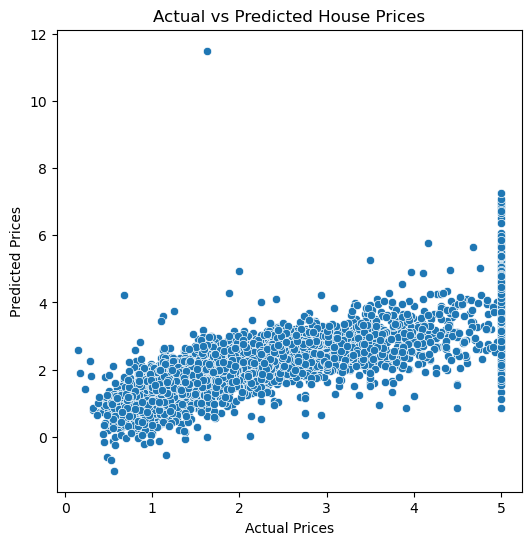

In [9]:
y_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")


plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [11]:
import joblib

joblib.dump(lin_reg, "house_price_model.pkl")

print("Model saved as house_price_model.pkl")

Model saved as house_price_model.pkl
